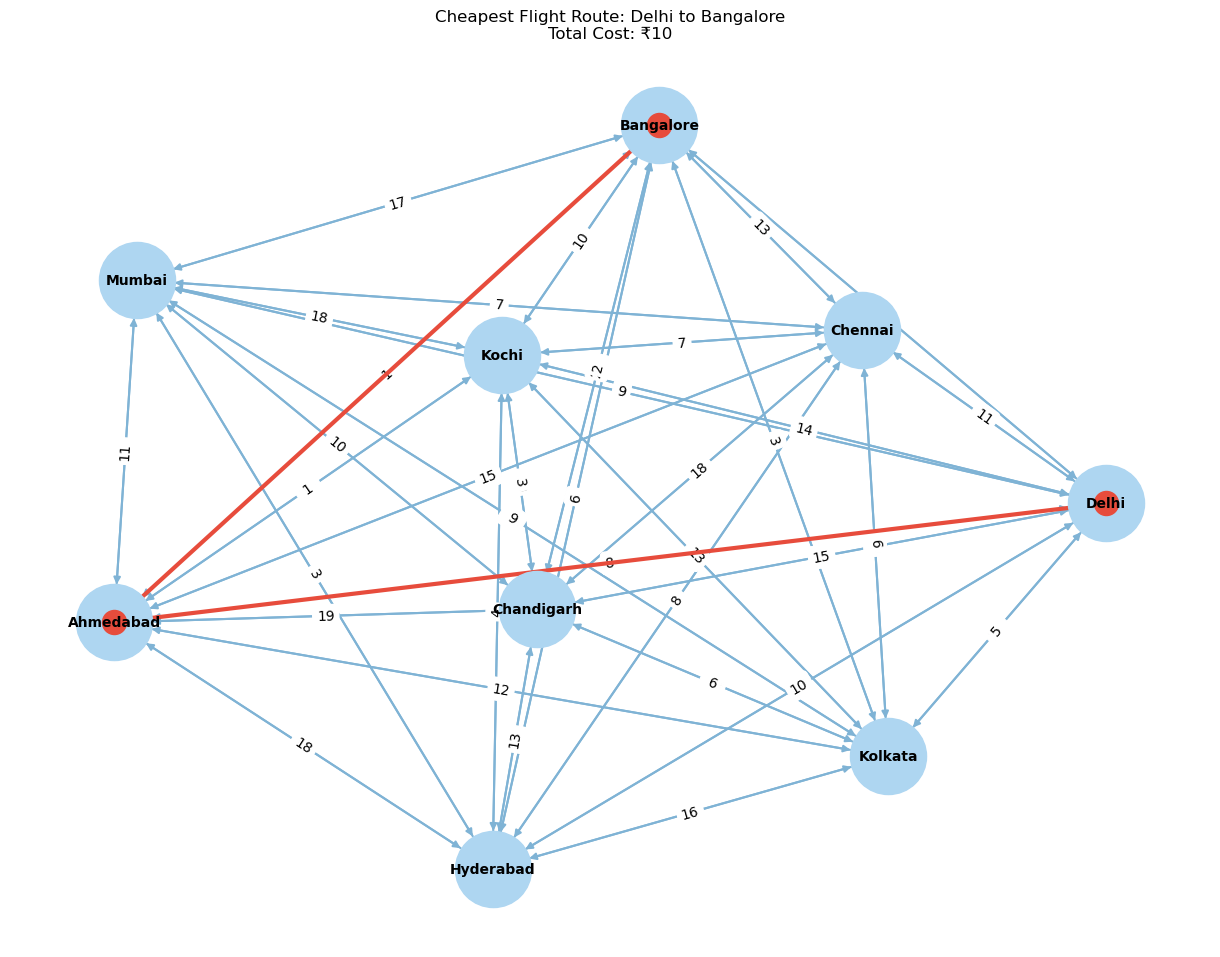

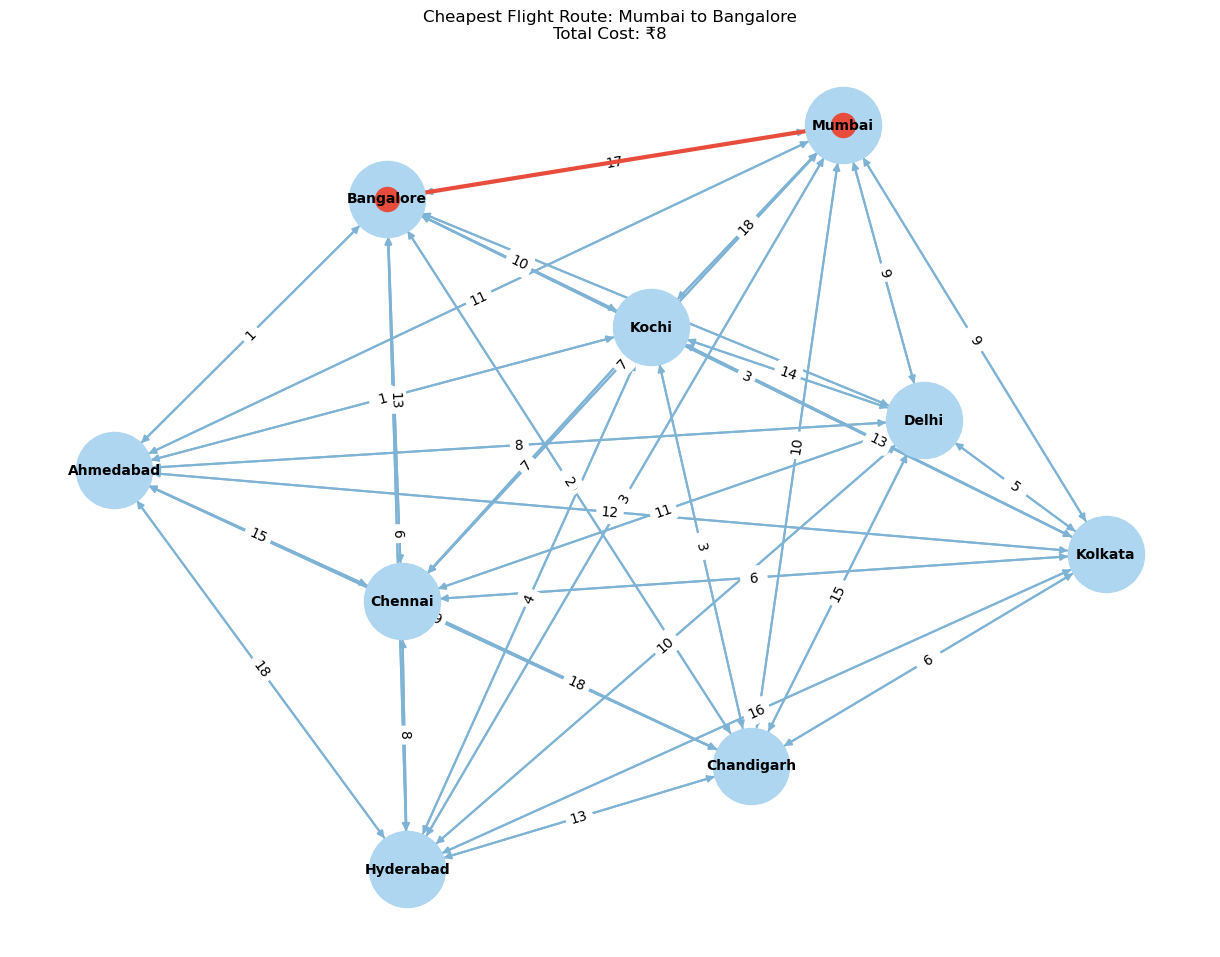

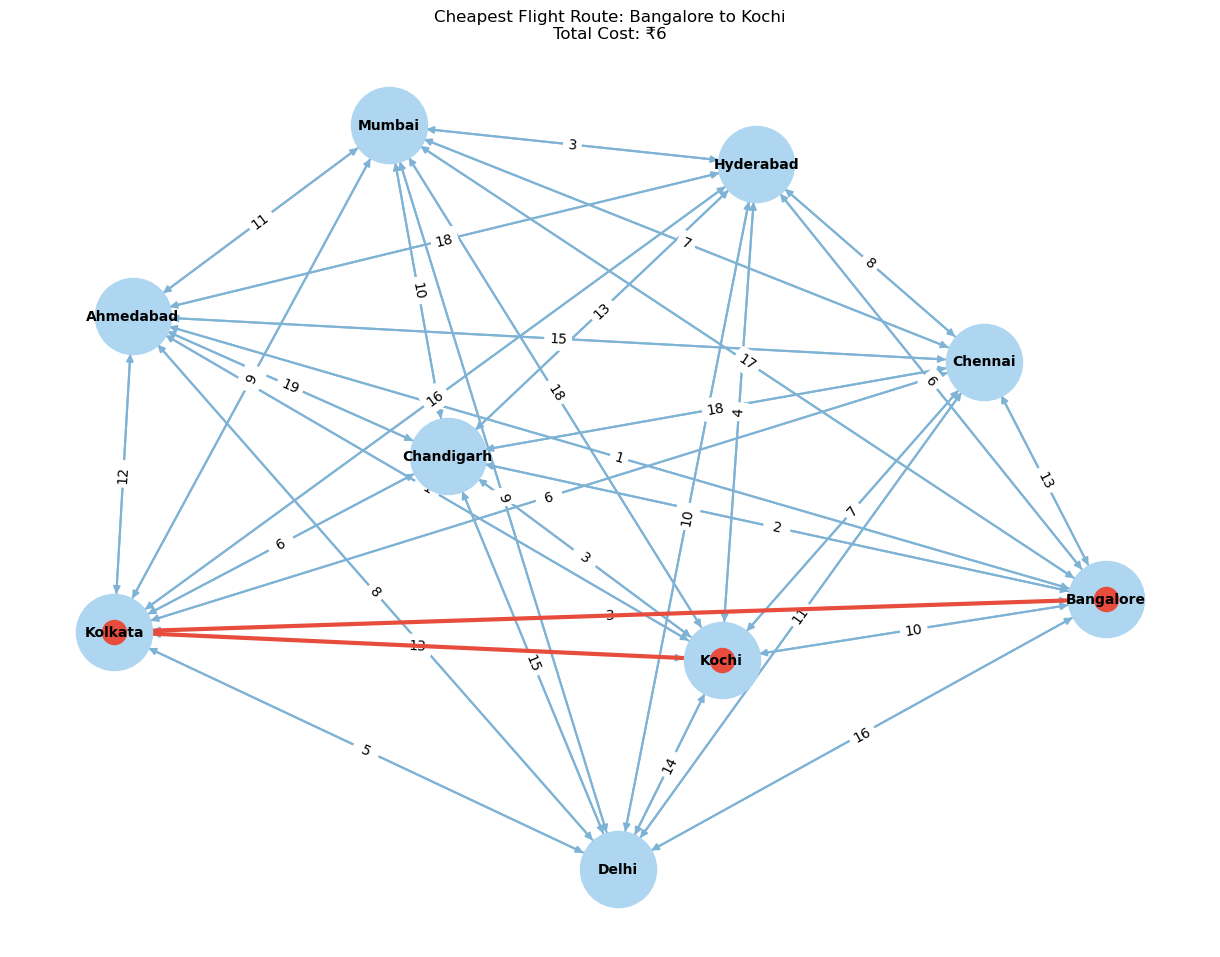

In [1]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import tkinter as tk
from tkinter import messagebox

# Dijkstra's algorithm
def dijkstra(graph, start):
    queue = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    return distances, previous_nodes

def shortest_path(graph, start, end):
    distances, previous_nodes = dijkstra(graph, start)
    path = []
    step = end

    while step:
        path.append(step)
        step = previous_nodes[step]

    path.reverse()
    return path, distances[end]

def calculate_shortest_path():
    if start_city.get() == "None" or end_city.get() == "None":
        messagebox.showerror("Invalid Input", "Please select both start and end cities.")
    else:
        start = start_city.get()
        end = end_city.get()
        path, cost = shortest_path(graph, start, end)
        result_label.config(
            text=f"Shortest path: {' → '.join(path)}\nTotal cost: ₹{cost:,}",
            fg="black"
        )
        visualize_path(path, start, end)

def visualize_path(path, start, end):
    G = nx.DiGraph()

    for node in graph:
        for neighbor, weight in graph[node].items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, k=0.5)
    plt.figure(figsize=(12, 9))
    nx.draw(G, pos, with_labels=True, node_color='#AED6F1', node_size=3000,
            font_size=10, font_weight='bold', edge_color='#7FB3D5',
            width=1.5, arrows=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='black')

    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='#E74C3C')
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='#E74C3C', width=3)
    plt.title(f"Cheapest Flight Route: {start} to {end}\nTotal Cost: ₹{sum(graph[u][v] for u, v in path_edges):,}", color='black')
    plt.show()

graph = {
    'Delhi': {'Mumbai': 4, 'Ahmedabad': 8, 'Bangalore': 12, 'Hyderabad': 15, 'Chennai': 3, 'Kolkata': 18, 'Kochi': 7, 'Chandigarh': 10},
    'Mumbai': {'Bangalore': 8, 'Hyderabad': 5, 'Delhi': 9, 'Ahmedabad': 14, 'Chennai': 2, 'Kolkata': 11, 'Kochi': 6, 'Chandigarh': 13},
    'Bangalore': {'Hyderabad': 7, 'Kolkata': 4, 'Delhi': 16, 'Mumbai': 17, 'Chennai': 5, 'Kochi': 19, 'Ahmedabad': 1, 'Chandigarh': 20},
    'Hyderabad': {'Chennai': 9, 'Kochi': 2, 'Delhi': 10, 'Mumbai': 3, 'Bangalore': 6, 'Kolkata': 12, 'Ahmedabad': 18, 'Chandigarh': 14},
    'Chennai': {'Kolkata': 10, 'Delhi': 11, 'Mumbai': 7, 'Bangalore': 13, 'Hyderabad': 8, 'Kochi': 4, 'Ahmedabad': 15, 'Chandigarh': 17},
    'Kolkata': {'Kochi': 2, 'Delhi': 5, 'Mumbai': 9, 'Bangalore': 3, 'Hyderabad': 16, 'Chennai': 6, 'Ahmedabad': 12, 'Chandigarh': 19},
    'Kochi': {'Ahmedabad': 1, 'Delhi': 14, 'Mumbai': 18, 'Bangalore': 10, 'Hyderabad': 4, 'Chennai': 7, 'Kolkata': 13, 'Chandigarh': 20},
    'Ahmedabad': {'Delhi': 8, 'Chandigarh': 7, 'Mumbai': 11, 'Bangalore': 2, 'Hyderabad': 17, 'Chennai': 12, 'Kolkata': 5, 'Kochi': 16},
    'Chandigarh': {'Bangalore': 2, 'Kolkata': 6, 'Delhi': 15, 'Mumbai': 10, 'Hyderabad': 13, 'Chennai': 18, 'Kochi': 3, 'Ahmedabad': 19}
}

# GUI
root = tk.Tk()
root.title("Flight Route Planner")
root.configure(bg='#EAEDED')

window_width = 900
window_height = 700
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
center_x = int(screen_width/2 - window_width/2)
center_y = int(screen_height/2 - window_height/2)
root.geometry(f'{window_width}x{window_height}+{center_x}+{center_y}')

title_frame = tk.Frame(root, bg='#FF9933')
title_frame.pack(fill=tk.X, pady=(0, 10))
tk.Label(title_frame, text="Flight Route Planner", font=('Arial', 16, 'bold'),
         bg='#FF9933', fg='black').pack()

start_city = tk.StringVar(value="None")
end_city = tk.StringVar(value="None")

selection_frame = tk.Frame(root, bg='#EAEDED')
selection_frame.pack(pady=10)

start_frame = tk.Frame(selection_frame, bg='#EAEDED')
start_frame.pack(side=tk.LEFT, padx=20)
tk.Label(start_frame, text="Departure City:", font=('Arial', 11, 'bold'),
         bg='#EAEDED', fg='black').pack()

end_frame = tk.Frame(selection_frame, bg='#EAEDED')
end_frame.pack(side=tk.LEFT, padx=20)
tk.Label(end_frame, text="Arrival City:", font=('Arial', 11, 'bold'),
         bg='#EAEDED', fg='black').pack()

for city in graph.keys():
    tk.Radiobutton(start_frame, text=city, variable=start_city, value=city,
                   bg='#EAEDED', fg='black', anchor=tk.W).pack(fill=tk.X)
    tk.Radiobutton(end_frame, text=city, variable=end_city, value=city,
                   bg='#EAEDED', fg='black', anchor=tk.W).pack(fill=tk.X)

result_label = tk.Label(root, text="Your flight route will appear here.",
                        wraplength=800, font=('Arial', 11),
                        bg='#EAEDED', fg='black')
result_label.pack(pady=20)

tk.Button(root, text="Find Cheapest Route", command=calculate_shortest_path,
          bg='#138808', fg='black', font=('Arial', 12, 'bold')).pack(pady=10)

def update_display(*args):
    pass  # could be used to show dynamic selections

start_city.trace_add('write', update_display)
end_city.trace_add('write', update_display)

root.mainloop()